In [1]:
import psycopg2
import json
from sqlalchemy import create_engine

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime

real_talk_color = '#3adec3' # darker shade so its not so annoying to look at 


## The goal of the analysis:
- provide resources for youth to get help they need
- crowdsource stories so youth dont feel alone
- 

The point of using sqlalchemy is to make it harder for sql injections to happen due to the use of variables instead of raw sql

[example article](https://towardsdatascience.com/sqlalchemy-python-tutorial-79a577141a91)

In [3]:
with open('credentials.json') as file:
    credentials = json.load(file) 
    file.close()

In [4]:
# creating an engine to execute the commands

connection_string = (f"""postgres://{credentials['user']}:{credentials['password']}@"""
f"""{credentials['host']}/{credentials['database']}""")

In [6]:
engine = create_engine(connection_string)
connection = engine.connect()

In [7]:
print(engine.table_names())

['story_data']


In [8]:
drop_table_string = """
DROP TABLE IF EXISTS story_data

"""

engine.execute(drop_table_string)
print(engine.table_names())

[]


In [9]:
stories_data = pd.read_csv('../data/stories_2019.csv')
stories_data.head()

,Id,Perspective,Age,Lgbtq,Race,Phone,Topic,Title,Lede,Published at,...,Cringey,Haha,Me too,Interesting,Story texts,Link url,Link photo url,Link title,Link site name,Link body
0,2269,female,19.0,no,white,870,relationships,NaN,NaN,NaN,...,0,0,0,0,Well I was in my house and when I asked my eye...,NaN,NaN,NaN,NaN,NaN
1,2268,female,18.0,no,white,3253073887,bullying,NaN,I just need to work on my confidence,2020-01-06 00:00:00 UTC,...,1,1,1,1,My confident isnt the best. Its not with the w...,https://kidshealth.org/en/teens/self-esteem.html,NaN,How can I improve my self-esteem?,Teens Health,NaN
2,2267,female,18.0,yes,other,(304) 691-3740,puberty,NaN,NaN,NaN,...,0,0,0,0,His name is Jeffery but we call him jeff💖; I a...,NaN,NaN,NaN,NaN,NaN
3,2266,female,22.0,yes,white,0575809857,bullying,NaN,NaN,NaN,...,0,0,0,0,The was Robert My boyfriend ; Nothing really. ...,NaN,NaN,NaN,NaN,NaN
4,2265,female,15.0,yes,Latina,9793642515,puberty,NaN,NaN,NaN,...,0,0,0,0,They were my ex and I still loved him.💘But the...,NaN,NaN,NaN,NaN,NaN


In [10]:
stories_data.columns = [str.lower(column) for column in stories_data.columns]
stories_data.columns = [column.replace(' ', '_') for column in stories_data.columns]

In [11]:
stories_data.set_index('id', inplace=True)

In [12]:
table_name = 'story_data'
stories_data.to_sql(table_name, connection)

In [13]:
print(engine.table_names())

['story_data']


In [14]:
query_string = '''
SELECT * FROM story_data
'''
results = connection.execute(query_string).fetchall()
stories_data = pd.DataFrame(results)
stories_data.columns = results[0].keys()

In [15]:
# have to remember to close the connection to prevent against resource leak

connection.close()

In [16]:
stories_data.head()

,id,perspective,age,lgbtq,race,phone,topic,title,lede,published_at,...,cringey,haha,me_too,interesting,story_texts,link_url,link_photo_url,link_title,link_site_name,link_body
0,2269,female,19.0,no,white,870,relationships,None,None,None,...,0,0,0,0,Well I was in my house and when I asked my eye...,None,None,None,None,None
1,2268,female,18.0,no,white,3253073887,bullying,None,I just need to work on my confidence,2020-01-06 00:00:00 UTC,...,1,1,1,1,My confident isnt the best. Its not with the w...,https://kidshealth.org/en/teens/self-esteem.html,None,How can I improve my self-esteem?,Teens Health,None
2,2267,female,18.0,yes,other,(304) 691-3740,puberty,None,None,None,...,0,0,0,0,His name is Jeffery but we call him jeff💖; I a...,None,None,None,None,None
3,2266,female,22.0,yes,white,0575809857,bullying,None,None,None,...,0,0,0,0,The was Robert My boyfriend ; Nothing really. ...,None,None,None,None,None
4,2265,female,15.0,yes,Latina,9793642515,puberty,None,None,None,...,0,0,0,0,They were my ex and I still loved him.💘But the...,None,None,None,None,None


In [24]:
# changing the index of the df

stories_data.rename(columns ={'id': 'story_id'}
                    , inplace=True)

In [18]:
# there are some columns that i dont need anymore
remove_columns = [column for column in stories_data.columns if 'link' in column]

In [19]:
stories_data.drop(remove_columns
                 , axis=1 # to check the columns intead of the rows
                 , inplace=True)

In [20]:
# what columns do we have to work with

stories_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2061 entries, 2269 to 1
Data columns (total 15 columns):
perspective     2061 non-null object
age             1595 non-null float64
lgbtq           1595 non-null object
race            1595 non-null object
phone           1595 non-null object
topic           2061 non-null object
title           701 non-null object
lede            817 non-null object
published_at    819 non-null object
like            2061 non-null int64
cringey         2061 non-null int64
haha            2061 non-null int64
me_too          2061 non-null int64
interesting     2061 non-null int64
story_texts     2060 non-null object
dtypes: float64(1), int64(5), object(9)
memory usage: 257.6+ KB


In [49]:
# is there a difference between posts that were published and posts that weren't published?

## Things to note:
- reactions from users are located in like, cringey, haha, me_too, interesting

In [40]:
# preprocessing the data
# these are columns that are free entry

stories_data.race = stories_data.race.str.strip()
stories_data.race = stories_data.race.str.lower()

stories_data.story_texts = stories_data.story_texts.str.strip()
stories_data.story_texts = stories_data.story_texts.str.lower()

stories_data.published_at = pd.to_datetime(stories_data.published_at)
stories_data.published_at = stories_data.published_at.dt.date # removing the time since its in utc and admin approved

stories_data.head()

,story_id,perspective,age,lgbtq,race,phone,topic,title,lede,published_at,like,cringey,haha,me_too,interesting,story_texts
0,2269,female,19.0,no,white,870,relationships,None,None,NaT,0,0,0,0,0,well i was in my house and when i asked my eye...
1,2268,female,18.0,no,white,3253073887,bullying,None,I just need to work on my confidence,2020-01-06,1,1,1,1,1,my confident isnt the best. its not with the w...
2,2267,female,18.0,yes,other,(304) 691-3740,puberty,None,None,NaT,0,0,0,0,0,his name is jeffery but we call him jeff💖; i a...
3,2266,female,22.0,yes,white,0575809857,bullying,None,None,NaT,0,0,0,0,0,the was robert my boyfriend ; nothing really. ...
4,2265,female,15.0,yes,latina,9793642515,puberty,None,None,NaT,0,0,0,0,0,they were my ex and i still loved him.💘but the...


In [46]:
num_counts = len(stories_data)
num_counts, len(set(stories_data.story_id)) # to check assumptions

(2061, 2061)

In [41]:
# what is the time period of published stories
min(stories_data.published_at.dropna()), max(stories_data.published_at.dropna())

# it would be interesting to know when the stories were submitted and also have the timezone for the submission from user

(datetime.date(2017, 9, 5), datetime.date(2020, 4, 4))

In [43]:
stories_data.sort_values('published_at', ascending=False).head()

# it seems like there are some stories that have the incorrect date or are scheduled to be published in the future..

,story_id,perspective,age,lgbtq,race,phone,topic,title,lede,published_at,like,cringey,haha,me_too,interesting,story_texts
94,2175,female,15.0,no,white,3045599036,puberty,None,at one point they were my best friend.. now th...,2020-04-04,0,0,0,0,0,at one point they were my best friend.. now th...
159,2115,female,19.0,no,black,2403927246,bullying,None,He did not think that I would be able to get i...,2020-04-02,0,0,0,0,0,i have had an english teacher judge me in high...
142,2127,male,22.0,yes,white,9199239218,puberty,None,I didn’t want to risk ruining our friendship b...,2020-04-01,0,0,0,0,0,"when i am attracted to someone, especially som..."
144,2109,female,21.0,no,white,6509061259,bullying,None,They thought they were better than me,2020-03-31,0,0,0,0,0,i felt judged by my friends when i didn’t do w...
158,2116,female,19.0,no,white,6167197503,puberty,None,"The first time this happened, I kissed him.",2020-03-30,0,0,0,0,0,"when i am attracted to someone, i have no prob..."


In [ ]:
# validate the results by looking at the engagement

stories_data[stories_data.published_at >= datetime.now().date()].sum(axis=0)

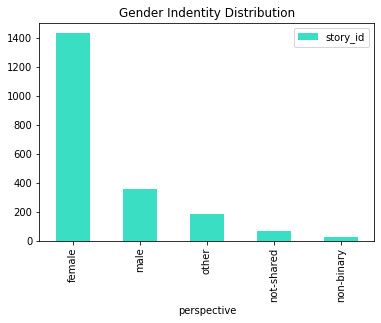

In [31]:
# what is the distribution of gender for submitted stories?

perspective_counts = stories_data.groupby('perspective').count()['story_id'].to_frame()

perspective_counts.sort_values('story_id', ascending=False, inplace=True)
perspective_counts.plot.bar(color=real_talk_color)
plt.title('Gender Indentity Distribution')


plt.show();

In [45]:
# it would be more helpful to see this in terms of pct

perspective_counts['pct'] = perspective_counts.story_id / num_counts
perspective_counts.head()

,story_id,pct
perspective,,
female,1430,0.693838
male,359,0.174187
other,181,0.087821
not-shared,65,0.031538
non-binary,26,0.012615


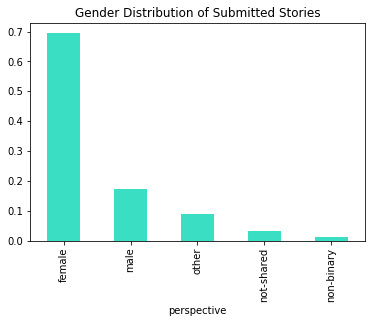

In [48]:
perspective_counts['pct'].plot.bar(color=real_talk_color)
plt.title('Gender Distribution of Submitted Stories')

plt.show()

[How to overlay the values of the bar onto the graph](https://stackoverflow.com/questions/30228069/how-to-display-the-value-of-the-bar-on-each-bar-with-pyplot-barh)

In [62]:
# when analyzing the engagement of queued posts, we have to remove them from the dataset bc users havent engaged yet
from datetime import datetime

stories_data[stories_data.published_at >= datetime.now().date()].sum(axis=0)

story_id                                                  121293
perspective    femalefemalefemalefemalefemalefemalefemalefema...
age                                                         1043
lgbtq          yesnoyesnoyesnononononoyesyesnoyesnoyesyesnono...
race           blackwhitewhitelatinxblackotherwhitewhitelatin...
phone          4439794725254669417100000000000000092921712516...
topic          relationshipspubertypubertypubertypubertypuber...
title                                                          0
lede           I took advantage of him and how good he treate...
like                                                           0
cringey                                                        0
haha                                                           0
me_too                                                         0
interesting                                                    0
story_texts    this boy had a crush on me for two years strai...
dtype: object

In [67]:
not_published = stories_data[stories_data.published_at.isna()]
not_published_count = len(not_published)

not_published_perspective = not_published.groupby('perspective').count()['story_id'].to_frame()
not_published_perspective['pct'] = not_published_perspective.story_id / not_published_count
not_published_perspective.sort_values('story_id'
                                     , ascending=False
                                     , inplace=True)
not_published_perspective.head()

,story_id,pct
perspective,,
female,861,0.693237
male,168,0.135266
other,141,0.113527
not-shared,52,0.041868
non-binary,20,0.016103


In [70]:
stories_data.story_texts[0] # this seems to be a question and answer format so it would be difficult to piece the conversation without making assumptions


"well i was in my house and when i asked my eyes went pitch black and i passed out ; hurting really bad; well i passed out and i don't remember ; i don't know; i don't know; now way"

In [71]:
stories_data.story_texts[1]

'my confident isnt the best. its not with the way i look, i dont consider myself ugly. but i feel like the second i walk into the room evrybody is judging me. when in reality theyre probably not, im just paranoid. ; im not this easy going laid back teen, i stick to my priorities. i stick to my goals. ; my family never really went to college. so schooling is all ive got. im just constantly thinking, is that guy over there making fun of me. or is that girl talking about me behind my back. ; i have friends im not a nobody. i just need to work on my confidence. i guess i need to value myself alot more. ; it makes me feel better that my friends always have my back.; i dont know what id do without them'